In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import pandas as pd

**MNIST**

In [ ]:
mnist = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

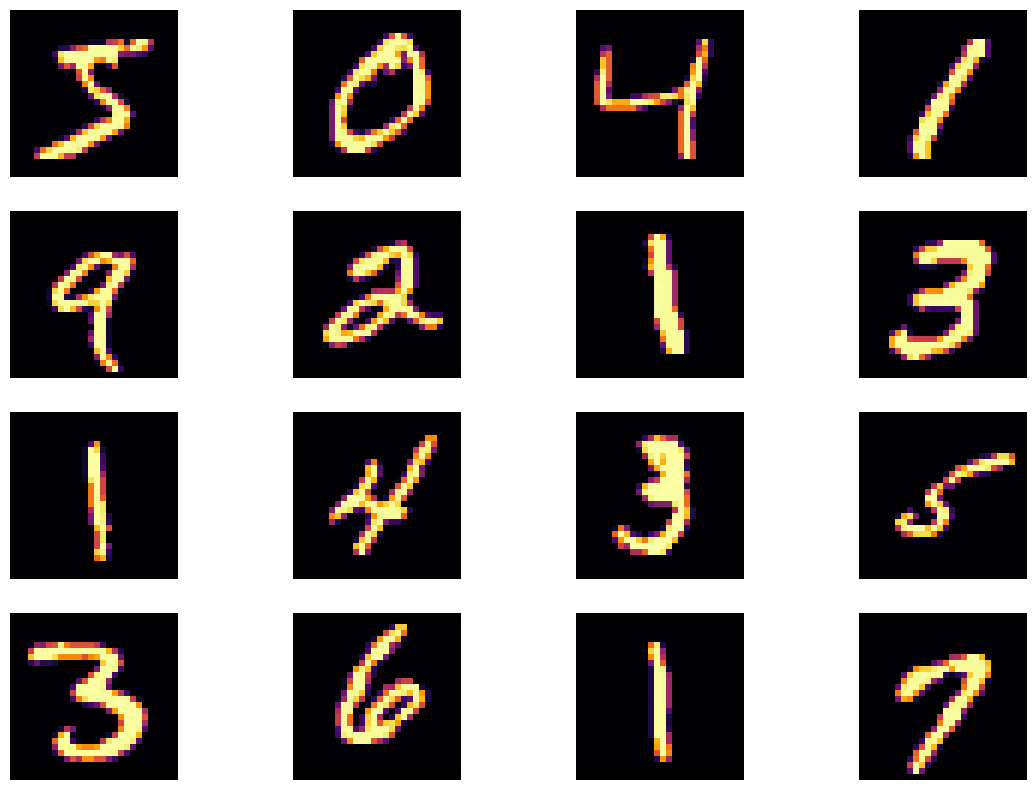

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='inferno')
  plt.axis('off')
plt.show()

In [ ]:
class hamming_network:
    def __init__(self):
        self.data = keras.datasets.mnist.load_data()
        self.bin_references = self.prepare_references()

    def prepare_references(self):
        (x_train, y_train), _ = self.data
        references = []
        for digit in range(10):
            i = np.where(y_train == digit)[0][0]
            references.append(x_train[i])
        references = np.array(references)
        return np.array([self.to_binary(img, 128) for img in references])

    def to_binary(self, img, limit):
        return np.where(img > limit, 1, 0)

    def hamming_dist(self, x, y):
        return np.count_nonzero(x != y)

    def closest_match(self, img):
        distances = [self.hamming_dist(img, ref) for ref in self.bin_references]
        return np.argmin(distances)

    def predict(self, imgs):
        imgs_bin = np.array([self.to_binary(img, 128) for img in imgs])
        return [self.closest_match(img) for img in imgs_bin]

    def fit(self, imgs, labels):
        pred = self.predict(imgs)
        return np.mean(pred == labels), pred

In [ ]:
x_test = np.concatenate((x_train, x_test), axis=0)
y_test = np.concatenate((y_train, y_test), axis=0)

In [ ]:
h = hamming_network()
accuracy, pred = h.fit(x_test, y_test)

In [ ]:
print(f"accuracy: {accuracy}\n")
print(classification_report(y_test, pred))

accuracy: 0.4935578947368421

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     18749
           1       0.33      0.80      0.47     21361
           2       0.80      0.29      0.43     18906
           3       0.52      0.41      0.46     19403
           4       0.46      0.21      0.29     18508
           5       0.45      0.26      0.33     17155
           6       0.76      0.66      0.71     18712
           7       0.54      0.51      0.52     19823
           8       0.54      0.29      0.38     18527
           9       0.33      0.61      0.43     18856

    accuracy                           0.49    190000
   macro avg       0.56      0.49      0.49    190000
weighted avg       0.56      0.49      0.49    190000



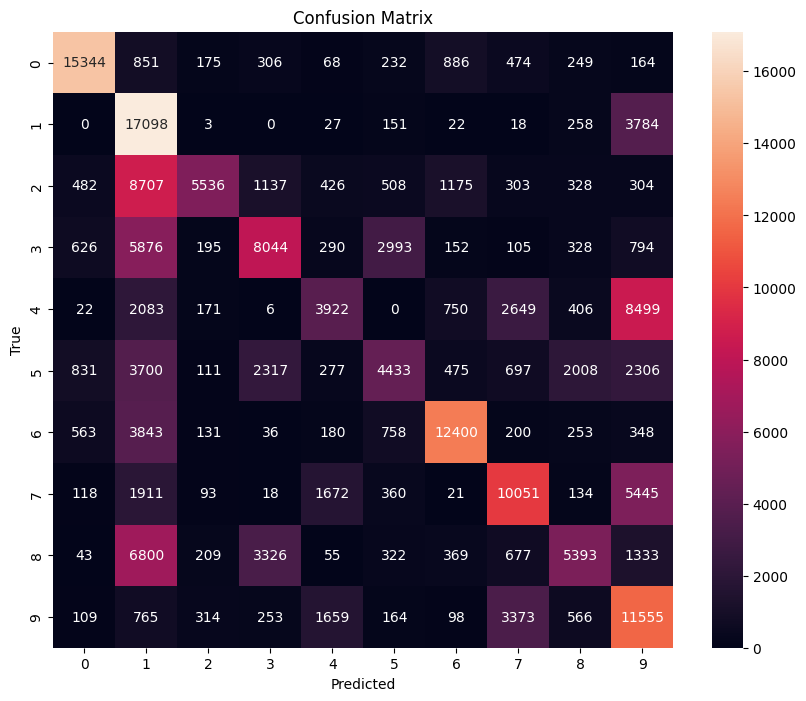

In [ ]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()